# DAS-732 ASSIGNMENT-3 TEAM - GRAPHGEEKS
### MEMBERS:
- ASHIRWAD MISHRA IMT2022108 (Team Lead)
- KRISH PATEL IMT2022097
- VANSH SINHA IMT2022122

## Original Dataset description and Visual Analytics Workflow

![VA_Workflow](Workflow.png)

### Column-wise Description of Dataset

1. **Commodity Code**  
   - Code representing the commodity or industry from BEA Make and Use Tables 2012.  
   - Includes two levels: 'Detail' (405 sectors) and 'Summary' (medium resolution, 73 commodities & 71 industries).  

2. **Commodity Name**  
   - Name of the commodity or industry.  
   - Detail commodities use USEEIO v1.1 names.

3. **Substance**  
   - Greenhouse gases:  
     - CO2: Carbon dioxide  
     - CH4: Methane  
     - N2O: Nitrous oxide  
     - Other GHGs: HFCs, CF4, SF6, etc.

4. **Unit**  
   - Emission factors in CO2e (carbon dioxide equivalents) using IPCC AR4 GWP factors.  
   - Purchaser price includes producer price + margins.

5. **Supply Chain Emission Factors without Margins**  
   - GHG emissions from cradle to production point (kg) per 2018 USD.

6. **Margins of Supply Chain Emission Factors**  
   - GHG emissions from production to sale (kg) per 2018 USD.

7. **Supply Chain Emission Factors with Margins**  
   - GHG emissions from cradle to sale (kg) per 2018 USD.

8. **DQ Reliability Score of Factors without Margins**  
   - Data reliability score (1 = best, 5 = worst).  

9. **DQ Temporal Correlation of Factors without Margins**  
   - Temporal correlation score (1 = best, 5 = worst).  

10. **DQ Geographical Correlation of Factors without Margins**  
    - Geographical correlation score (1 = best, 5 = worst).  

11. **DQ Technological Correlation of Factors without Margins**  
    - Technological correlation score (1 = best, 5 = worst).  

12. **DQ Data Collection of Factors without Margins**  
    - Data collection score (1 = best, 5 = worst).  

13. **Year**  
    - Added column indicating the year of data recording (created during dataset cleaning).


### Additional Dataset is quite comprehensive and not all of it was used in this assignment, hence would be described whenever invoked into a workflow iteration.

## VISUAL ANALYTICS WORKFLOW

- **Choose Dataset for Model Training:**  
  The workflow begins with selecting a dataset for model training. This dataset contains the primary emission data used for analysis.

- **Emission Data and Additional Data:**  
  These are the primary sources of information. *Emission data* represents the core dataset, while *additional data* complements it by providing supplementary information.

- **Cleaning Process:**  
  The raw data (both emission and additional) undergoes a cleaning process to ensure consistency, completeness, and readiness for analysis. This process removes invalid or missing values, standardizes formats, and prepares the datasets for downstream tasks.

- **Clean Emission Data and Clean Additional Data:**  
  After the cleaning process, the emission and additional datasets are stored separately as cleaned datasets. These cleaned datasets are critical for ensuring accurate analysis and visualization.

- **Visualizations:**  
  Cleaned datasets are transformed into visual representations, facilitating the mapping of data insights. These visualizations highlight patterns, trends, and anomalies in the emission data and serve as a precursor for further modeling.

- **Model:**  
  This component involves the application of machine learning or statistical models on the cleaned data. Models are trained to extract inferences, predict trends, and provide actionable insights.

- **Knowledge:**  
  The end goal of the workflow is to convert data into knowledge. Insights derived from visualizations and models are aggregated, validated, and presented as meaningful knowledge to stakeholders.


- **Subflow-1:**  
  Connects visualizations to the knowledge component with a feedback loop for iterative refinement of visual representations, enhancing data interpretation.

- **Subflow-2:**  
  Links cleaned additional data to visualizations and knowledge. Introduces a feedback loop to refine how supplementary information enriches the analysis.

- **Subflow-3:**  
  Focuses on applying machine learning models. Involves selecting, cleaning, and preparing datasets (emission or additional data) and training ML models to extract insights.


## TASKS UNDERTAKEN IN THIS ASSIGNMENT:
- **Task 1: Industry-Level Emissions Over Time:**  
  Analyze historical GHG emissions by industries to identify trends, key contributors, and changes over time.

- **Task 2: Commodity-Specific Emissions and Their Drivers:**  
  Examine the link between commodity sales and emissions to identify high-emission products and their drivers.

- **Task 3: Deeper Analysis into Specific Sectors' Emissions:**  
  Perform detailed evaluations of emissions within sectors to explore variability and high-emission sub-sectors.


# Import Necessary Libraries
This cell imports libraries like Pandas, NumPy, and Matplotlib for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data and Display First Few Rows
This cell reads data from a CSV file named 'Summary_Industry.csv' and displays the first three rows to give an overview of the dataset.

In [2]:
ori = pd.read_csv("Summary_Industry.csv")
ori.head(3)

,Year,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,2016,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.466,0.043,0.510,4,2,1,4,1
1,2016,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,3,2,1,1,1
2,2016,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1


# Filter Data by Industry and Save to Separate Files
Here, data for specific industries (e.g., Utilities, Farms, Petroleum) is filtered from the main dataset and saved into separate CSV files.

In [3]:
utl = ori.loc[ori['Industry Name'] == 'Utilities']
utl.to_csv('2016_ind.csv', index = False)

farm = ori.loc[ori['Industry Name'] == 'Farms']
farm.to_csv('frm_ind.csv', index = False)

pet = ori.loc[ori['Industry Name'] == 'Petroleum and coal products']
pet.to_csv('pet_ind.csv', index = False)

wat = ori.loc[ori['Industry Name'] == 'Water transportation']
wat.to_csv('wat_ind.csv', index = False)

air = ori.loc[ori['Industry Name'] == 'Air transportation']
air.to_csv('air_ind.csv', index = False)

# Create Multi-Industry Emissions Visualization
This cell generates an interactive plot with multiple subplots showcasing emissions data for various industries across years.

In [4]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Read the CSV files
utilities_df = pd.read_csv('2016_ind.csv')
farms_df = pd.read_csv('frm_ind.csv')
petroleum_df = pd.read_csv('pet_ind.csv')

# Function to create interactive subplot visualization
def create_multi_industry_visualization(utilities_df, farms_df, petroleum_df):
    # Prepare data for each industry
    industries = {
        'Utilities': utilities_df,
        'Farms': farms_df,
        'Petroleum and Coal Products': petroleum_df
    }
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=1, 
        subplot_titles=list(industries.keys()),
        vertical_spacing=0.1
    )
    
    # Color palette for substances
    colors = {
        'carbon dioxide': 'red',
        'methane': 'blue', 
        'nitrous oxide': 'green',
        'other GHGs': 'purple'
    }
    
    # Add traces for each industry
    for idx, (industry, df) in enumerate(industries.items(), 1):
        substances = df['Substance'].unique()
        
        for substance in substances:
            subset = df[df['Substance'] == substance]
            fig.add_trace(
                go.Scatter(
                    x=subset['Year'], 
                    y=subset['Supply Chain Emission Factors with Margins'],
                    mode='lines+markers',
                    name=f'{industry} - {substance}',
                    line=dict(color=colors.get(substance, 'gray')),
                    hovertemplate=f'{industry} - {substance}<br>Year: %{{x}}<br>Emission Factor: %{{y:.4f}} kg/2018 USD<extra></extra>'
                ),
                row=idx, col=1
            )
    
    # Update layout
    fig.update_layout(
        height=1200, 
        width=1000, 
        title_text='Greenhouse Gas Emissions by Industry (2010-2016)',
        showlegend=True,
        hovermode='closest'
    )
    
    # Update y-axes titles
    fig.update_yaxes(title_text='Emission Factors (kg/2018 USD)', row=1, col=1)
    fig.update_yaxes(title_text='Emission Factors (kg/2018 USD)', row=2, col=1)
    fig.update_yaxes(title_text='Emission Factors (kg/2018 USD)', row=3, col=1)
    
    # Update x-axes titles
    fig.update_xaxes(title_text='Year', row=3, col=1)
    
    # Save the interactive plot
    fig.write_html('multi_industry_emissions.html')
    print("Interactive visualization saved as 'multi_industry_emissions.html'")
    fig.show()

# Generate visualization
create_multi_industry_visualization(utilities_df, farms_df, petroleum_df)

Interactive visualization saved as 'multi_industry_emissions.html'


# Create Braided Emissions Plot
This cell creates a braided plot, which highlights the emission factors across different industries and substances, adding a visual distinction between them.

In [5]:
import pandas as pd
import plotly.graph_objs as go

def create_braided_emissions_plot(utilities_df, farms_df, petroleum_df):
    """
    Create a braided plot for greenhouse gas emissions across multiple industries.
    
    Args:
    - utilities_df (pd.DataFrame): Utilities industry emissions data
    - farms_df (pd.DataFrame): Farms industry emissions data
    - petroleum_df (pd.DataFrame): Petroleum and Coal Products industry emissions data
    
    Returns:
    - plotly.graph_objs.Figure: Interactive braided emissions plot
    """
    # Color palette for industries and substances
    colors = {
        'Utilities': {
            'carbon dioxide': 'rgba(255, 0, 0, 0.7)',   # Red with transparency
            'methane': 'rgba(255, 165, 0, 0.7)',        # Orange with transparency
            'nitrous oxide': 'rgba(255, 69, 0, 0.7)',   # Red-Orange with transparency
            'other GHGs': 'rgba(220, 20, 60, 0.7)'      # Crimson with transparency
        },
        'Farms': {
            'carbon dioxide': 'rgba(0, 128, 0, 0.7)',   # Green with transparency
            'methane': 'rgba(34, 139, 34, 0.7)',        # Forest Green with transparency
            'nitrous oxide': 'rgba(0, 255, 127, 0.7)',  # Spring Green with transparency
            'other GHGs': 'rgba(107, 142, 35, 0.7)'     # Olive Drab with transparency
        },
        'Petroleum and Coal Products': {
            'carbon dioxide': 'rgba(0, 0, 255, 0.7)',   # Blue with transparency
            'methane': 'rgba(65, 105, 225, 0.7)',       # Royal Blue with transparency
            'nitrous oxide': 'rgba(30, 144, 255, 0.7)', # Dodger Blue with transparency
            'other GHGs': 'rgba(0, 191, 255, 0.7)'      # Deep Sky Blue with transparency
        }
    }
    
    # Prepare traces for the braided plot
    traces = []
    
    # Offset factors to create a braided effect
    offsets = {
        'Utilities': 0.1,
        'Farms': 0,
        'Petroleum and Coal Products': -0.1
    }
    
    # Create traces for each industry and substance
    for industry, df in [('Utilities', utilities_df), ('Farms', farms_df), ('Petroleum and Coal Products', petroleum_df)]:
        substances = df['Substance'].unique()
        
        for substance in substances:
            subset = df[df['Substance'] == substance]
            
            # Create a trace with a slight vertical offset
            trace = go.Scatter(
                x=subset['Year'],
                y=subset['Supply Chain Emission Factors with Margins'] + offsets[industry],
                mode='lines+markers',
                name=f'{industry} - {substance}',
                line=dict(
                    color=colors[industry][substance],
                    width=2,
                    shape='spline'  # Use spline interpolation for smoother lines
                ),
                hovertemplate=f'{industry} - {substance}<br>Year: %{{x}}<br>Emission Factor: %{{y:.4f}} kg/2018 USD<extra></extra>'
            )
            traces.append(trace)
    
    # Create the figure layout
    layout = go.Layout(
        xaxis=dict(
            title='Year',
            gridcolor='lightgray',
            showline=True,
            linewidth=1,
            linecolor='black'
        ),
        yaxis=dict(
            title='Emission Factors (kg/2018 USD)',
            gridcolor='lightgray',
            showline=True,
            linewidth=1,
            linecolor='black'
        ),
        height=600,
        width=1000,
        hovermode='closest',
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        plot_bgcolor='white'
    )
    
    # Create figure
    fig = go.Figure(data=traces, layout=layout)
    
    # Save the interactive plot
    fig.write_html('braided_industry_emissions.html')
    print("Braided plot saved as 'braided_industry_emissions.html'")
    fig.show()
    return fig

# Example usage (replace with your actual data loading)
def main():
    # Read the CSV files
    utilities_df = pd.read_csv('2016_ind.csv')
    farms_df = pd.read_csv('frm_ind.csv')
    petroleum_df = pd.read_csv('pet_ind.csv')
    
    # Create the braided plot
    create_braided_emissions_plot(utilities_df, farms_df, petroleum_df)

if __name__ == '__main__':
    main()

Braided plot saved as 'braided_industry_emissions.html'


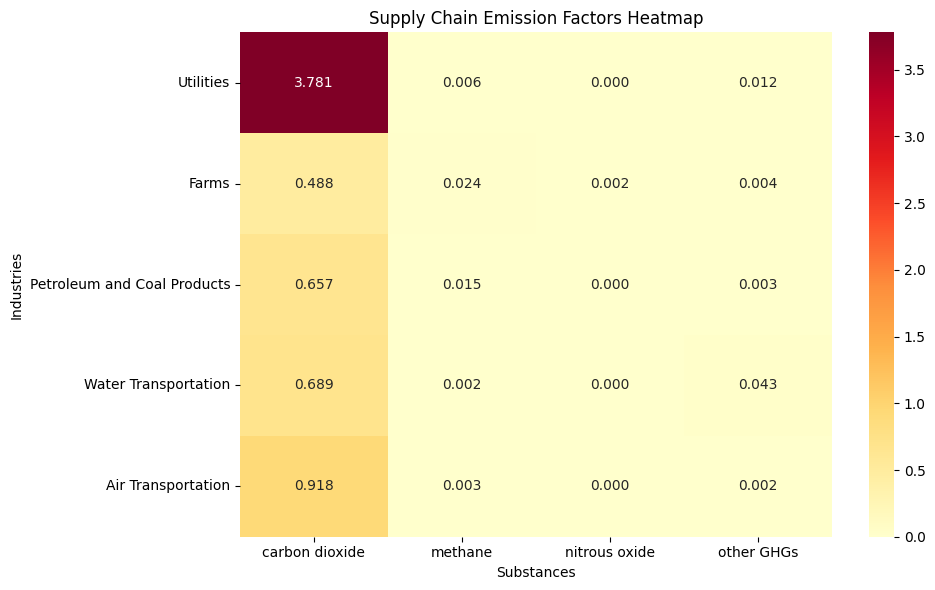

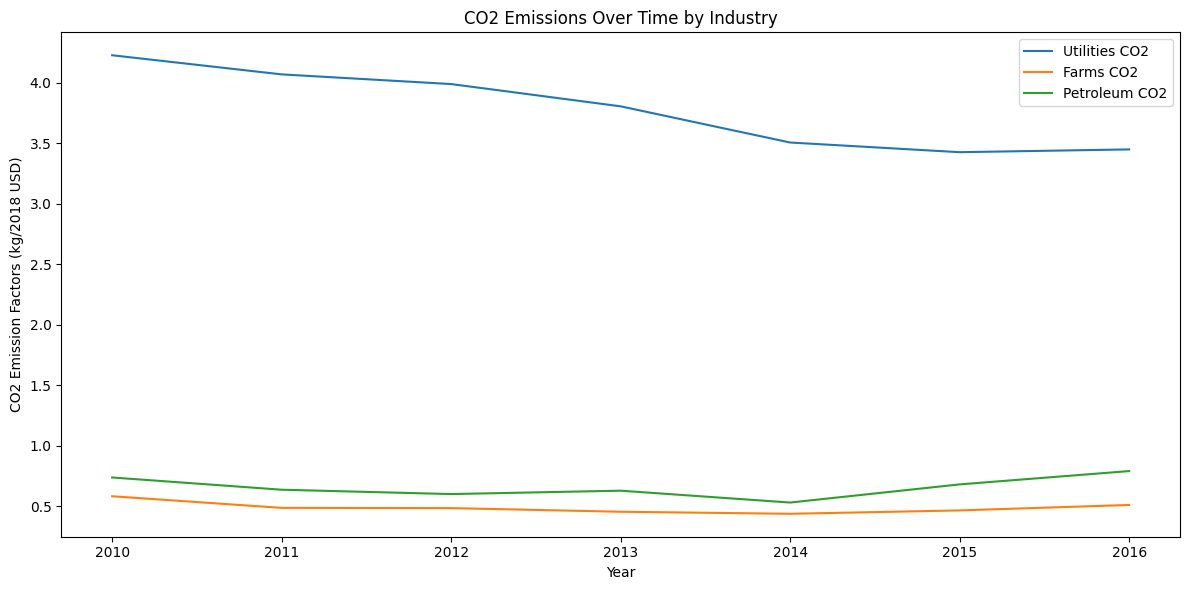

Visualizations have been created and saved.


In [6]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
utilities_df = pd.read_csv('2016_ind.csv')
farms_df = pd.read_csv('frm_ind.csv')
petroleum_df = pd.read_csv('pet_ind.csv')
water_df = pd.read_csv('wat_ind.csv')
air_df = pd.read_csv('air_ind.csv')

# Plotly Bar Chart
def create_plotly_bar_chart():
    # Prepare data for bar chart
    substances = ['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs']
    industries = {
        'Utilities': utilities_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Farms': farms_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Petroleum and Coal Products': petroleum_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Water Transportation': water_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Air Transportation': air_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean()
    }
    
    # Create bar chart
    fig = go.Figure()
    for industry, data in industries.items():
        fig.add_trace(go.Bar(
            x=substances,
            y=[data.get(substance, 0) for substance in substances],
            name=industry
        ))
    
    fig.update_layout(
        title='Average Supply Chain Emission Factors by Substance and Industry',
        xaxis_title='Substance',
        yaxis_title='Emission Factors (kg/2018 USD)',
        barmode='group'
    )
    
    # Save the plot
    pio.write_html(fig, file='emissions_bar_chart.html')
    fig.show()

# Matplotlib Heatmap
def create_matplotlib_heatmap():
    # Prepare data for heatmap
    heatmap_data = pd.DataFrame({
        'Utilities': utilities_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Farms': farms_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Petroleum and Coal Products': petroleum_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Water Transportation': water_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean(),
        'Air Transportation': air_df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean()
    }).T
    
    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('Supply Chain Emission Factors Heatmap')
    plt.xlabel('Substances')
    plt.ylabel('Industries')
    plt.tight_layout()
    plt.savefig('emissions_heatmap.png')
    plt.show()

# Time Series Line Plot
def create_time_series_plot():
    # Prepare data for time series
    plt.figure(figsize=(12, 6))
    
    # Plot CO2 emissions over time for each industry
    plt.plot(utilities_df[utilities_df['Substance'] == 'carbon dioxide']['Year'], 
             utilities_df[utilities_df['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors with Margins'], 
             label='Utilities CO2')
    plt.plot(farms_df[farms_df['Substance'] == 'carbon dioxide']['Year'], 
             farms_df[farms_df['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors with Margins'], 
             label='Farms CO2')
    plt.plot(petroleum_df[petroleum_df['Substance'] == 'carbon dioxide']['Year'], 
             petroleum_df[petroleum_df['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors with Margins'], 
             label='Petroleum CO2')
    
    plt.title('CO2 Emissions Over Time by Industry')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission Factors (kg/2018 USD)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('co2_time_series.png')
    plt.show()

# Execute all visualization functions
create_plotly_bar_chart()
create_matplotlib_heatmap()
create_time_series_plot()

print("Visualizations have been created and saved.")

In [7]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np

def create_horizon_plot():
    # Prepare data for horizon plot
    utilities_co2 = utilities_df[utilities_df['Substance'] == 'carbon dioxide']
    farms_co2 = farms_df[farms_df['Substance'] == 'carbon dioxide']
    petroleum_co2 = petroleum_df[petroleum_df['Substance'] == 'carbon dioxide']

    # Create traces with different color bands to simulate horizon plot effect
    def create_horizon_trace(df, name, color_rgb):
        traces = []
        y = df['Supply Chain Emission Factors with Margins']
        bands = 1  # Number of color bands
        
        # Create multiple bands with decreasing opacity
        for i in range(bands):
            threshold = np.percentile(y, (i + 1) * (100 / bands))
            trace = go.Scatter(
                x=df['Year'],
                y=np.minimum(y, threshold),
                mode='lines',
                name=f'{name} - Band {i+1}',
                line=dict(color='rgba(' + color_rgb + ', 0)', width=0),
                fill='tozeroy',
                fillcolor=f'rgba({color_rgb}, {0.2 * (bands - i)})'
            )
            traces.append(trace)
        
        # Add line on top
        traces.append(go.Scatter(
            x=df['Year'],
            y=y,
            mode='lines',
            name=name,
            line=dict(color=f'rgb({color_rgb})', width=2)
        ))
        
        return traces

    # Combine traces
    layout = go.Layout(
        title='CO2 Emissions Over Time by Industry (Horizon Plot)',
        xaxis_title='Year',
        yaxis_title='CO2 Emission Factors (kg/2018 USD)',
        hovermode='closest'
    )

    # Create figure with all traces
    fig = go.Figure(
        data=(
            create_horizon_trace(utilities_co2, 'Utilities', '31, 119, 180') +
            create_horizon_trace(farms_co2, 'Farms', '255, 127, 14') +
            create_horizon_trace(petroleum_co2, 'Petroleum', '44, 160, 44')
        ),
        layout=layout
    )

    # Save interactive HTML
    fig.write_html('co2_horizon_plot.html')
    fig.show()
    return fig

# Generate the plot
horizon_plot = create_horizon_plot()
print("Interactive CO2 emissions horizon plot created successfully.")

Interactive CO2 emissions horizon plot created successfully.


In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def prepare_clustering_data(utilities_df, farms_df, petroleum_df):
    """
    Prepare data for clustering by combining and preprocessing emissions data
    
    Args:
    - utilities_df (pd.DataFrame): Utilities industry emissions data
    - farms_df (pd.DataFrame): Farms industry emissions data
    - petroleum_df (pd.DataFrame): Petroleum and Coal Products industry emissions data
    
    Returns:
    - tuple: Processed DataFrame and feature matrix
    """
    # Combine dataframes
    combined_df = pd.concat([utilities_df, farms_df, petroleum_df], ignore_index=True)
    
    # Create a pivot table with wide format
    emissions_pivot = combined_df.pivot_table(
        index=['Year', 'Industry Name'], 
        columns='Substance', 
        values='Supply Chain Emission Factors with Margins',
        fill_value=0
    )
    
    # Flatten the multi-index
    emissions_pivot.reset_index(inplace=True)
    
    # Prepare feature matrix (excluding Year and Industry Name columns)
    feature_columns = [col for col in emissions_pivot.columns if col not in ['Year', 'Industry Name']]
    X = emissions_pivot[feature_columns].values
    
    return emissions_pivot, X

def perform_kmeans_clustering(X, n_clusters=3):
    """
    Perform K-means clustering on the prepared data
    
    Args:
    - X (numpy.ndarray): Feature matrix
    - n_clusters (int): Number of clusters to create
    
    Returns:
    - tuple: Clustering results and PCA transformation
    """
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA for visualization
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    return X_pca, clusters, kmeans, pca, scaler

def create_interactive_clustering_plot(emissions_pivot, X_pca, clusters):
    """
    Create an interactive 3D scatter plot of clusters
    
    Args:
    - emissions_pivot (pd.DataFrame): Original pivot table
    - X_pca (numpy.ndarray): PCA-transformed data
    - clusters (numpy.ndarray): Cluster assignments
    
    Returns:
    - plotly.graph_objs.Figure: Interactive clustering visualization
    """
    # Create a DataFrame with PCA and cluster information
    plot_df = emissions_pivot.copy()
    plot_df['PCA1'] = X_pca[:, 0]
    plot_df['PCA2'] = X_pca[:, 1]
    plot_df['PCA3'] = X_pca[:, 2]
    plot_df['Cluster'] = clusters
    
    # Create interactive 3D scatter plot
    fig = px.scatter_3d(
        plot_df, 
        x='PCA1', 
        y='PCA2', 
        z='PCA3',
        color='Cluster',
        hover_data=['Year', 'Industry Name'],
        title='K-Means Clustering of Emissions Data',
        labels={'PCA1': 'First Principal Component', 
                'PCA2': 'Second Principal Component', 
                'PCA3': 'Third Principal Component'}
    )
    
    fig.update_layout(
        scene=dict(
            xaxis_title='First Principal Component',
            yaxis_title='Second Principal Component',
            zaxis_title='Third Principal Component'
        ),
        height=800,
        width=1000
    )
    
    # Save the interactive plot
    fig.write_html('emissions_clustering.html')
    print("Interactive clustering visualization saved as 'emissions_clustering.html'")
    
    return fig

def analyze_clusters(emissions_pivot, clusters, kmeans):
    """
    Analyze and print details about the formed clusters
    
    Args:
    - emissions_pivot (pd.DataFrame): Original pivot table
    - clusters (numpy.ndarray): Cluster assignments
    - kmeans (KMeans): Fitted KMeans model
    """
    # Add cluster information to the original DataFrame
    cluster_df = emissions_pivot.copy()
    cluster_df['Cluster'] = clusters
    
    # Print cluster details
    print("\nCluster Analysis:")
    for cluster in range(kmeans.n_clusters):
        cluster_group = cluster_df[cluster_df['Cluster'] == cluster]
        
        print(f"\nCluster {cluster}:")
        print("Industries:", cluster_group['Industry Name'].unique())
        print("Years:", cluster_group['Year'].unique())
        
        # Print average emission factors for this cluster
        print("\nAverage Emission Factors:")
        cluster_columns = [col for col in cluster_df.columns if col not in ['Year', 'Industry Name', 'Cluster']]
        cluster_avg = cluster_group[cluster_columns].mean()
        print(cluster_avg)

def main():
    # Read the CSV files
    utilities_df = pd.read_csv('2016_ind.csv')
    farms_df = pd.read_csv('frm_ind.csv')
    petroleum_df = pd.read_csv('pet_ind.csv')
    
    # Prepare data for clustering
    emissions_pivot, X = prepare_clustering_data(utilities_df, farms_df, petroleum_df)
    
    # Perform K-means clustering
    X_pca, clusters, kmeans, pca, scaler = perform_kmeans_clustering(X)
    
    # Create interactive 3D clustering plot
    interactive_plot = create_interactive_clustering_plot(emissions_pivot, X_pca, clusters)
    
    # Analyze and print cluster details
    analyze_clusters(emissions_pivot, clusters, kmeans)

if __name__ == '__main__':
    main()

Interactive clustering visualization saved as 'emissions_clustering.html'

Cluster Analysis:

Cluster 0:
Industries: ['Petroleum and coal products']
Years: [2010 2011 2012 2013 2014 2015 2016]

Average Emission Factors:
Substance
carbon dioxide    0.657286
methane           0.014714
nitrous oxide     0.000000
other GHGs        0.003429
dtype: float64

Cluster 1:
Industries: ['Utilities']
Years: [2010 2011 2012 2013 2014 2015 2016]

Average Emission Factors:
Substance
carbon dioxide    3.780571
methane           0.006286
nitrous oxide     0.000000
other GHGs        0.012429
dtype: float64

Cluster 2:
Industries: ['Farms']
Years: [2010 2011 2012 2013 2014 2015 2016]

Average Emission Factors:
Substance
carbon dioxide    0.488286
methane           0.023571
nitrous oxide     0.002143
other GHGs        0.004143
dtype: float64


In [9]:
#2011 supplementary + original

ori_2011 = ori.loc[ori['Year'] == 2011]
pet_2011 = ori_2011.loc[ori_2011['Industry Name'] == 'Petroleum and coal products']
min_2011 = ori_2011.loc[ori_2011['Industry Name'] == 'Mining, except oil and gas']
wood_2011 = ori_2011.loc[ori_2011['Industry Name'] == 'Wood products']
plastic_2011 = ori_2011.loc[ori_2011['Industry Name'] == 'Plastics and rubber products']
waste_2011 = ori_2011.loc[ori_2011['Industry Name'] == 'Waste management and remediation services']

In [10]:
#CO2 analysis

ori_value1 = pet_2011.loc[pet_2011['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors without Margins'].sum()
ori_value2 = min_2011.loc[min_2011['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors without Margins'].sum()
ori_value3 = wood_2011.loc[wood_2011['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors without Margins'].sum()
ori_value4 = plastic_2011.loc[plastic_2011['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors without Margins'].sum()
ori_value5 = waste_2011.loc[waste_2011['Substance'] == 'carbon dioxide']['Supply Chain Emission Factors without Margins'].sum()

ori_value_co2 = ori_value1 + ori_value2 + ori_value3 + ori_value4 + ori_value5

supp_2011 = pd.read_excel('ghg-emission-factors-hub-2011.xlsx')
coal_emissions = supp_2011[17:37]
co2_em_coal_supp = coal_emissions['Unnamed: 4'].sum()
pur_price_2018 = 251
doll_per_million_btu = 3.15
con_value_co2 = co2_em_coal_supp/(pur_price_2018*doll_per_million_btu)

c:\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning:

Cannot parse header or footer so it will be ignored



In [11]:
con_value_co2

2.0906342882438502

In [12]:
ori_value_co2

2.095

In [13]:
import plotly.graph_objs as go
import plotly.io as pio

# Create interactive stacked bar chart
def create_co2_stacked_bar():
    # Components of original CO2 emissions
    original_components = {
        'Petroleum': ori_value1,
        'Mining': ori_value2,
        'Wood': ori_value3,
        'Plastic': ori_value4,
        'Waste': ori_value5
    }
    
    # Create a list of bars for original components
    original_bars = [
        go.Bar(
            name=component,
            x=['Original Emissions'],
            y=[value],
            text=[f'{component}: {value:.4f}'],
            textposition='auto',
            hoverinfo='text'
        )
        for component, value in original_components.items()
    ]
    
    # Add the supplementary emissions as a separate bar
    supplementary_bar = go.Bar(
        name='Supplementary CO2 Emissions',
        x=['Supplementary Emissions'],
        y=[con_value_co2],
        text=[f'Total: {con_value_co2:.4f}'],
        textposition='auto',
        hoverinfo='text'
    )
    
    # Combine all bars into a single figure
    fig = go.Figure(data=original_bars + [supplementary_bar])
    
    # Update layout
    fig.update_layout(
        title='CO2 Emissions: Original vs Supplementary (Year 2011)',
        yaxis_title='CO2 Emissions',
        barmode='stack',
        legend_title='Emission Sources'
    )
    
    # Save interactive HTML
    pio.write_html(fig, file='co2_ori_supp.html')
    fig.show()
    return fig

# Generate the plot
co2_plot = create_co2_stacked_bar()
print("Interactive CO2 emissions chart created successfully.")


Interactive CO2 emissions chart created successfully.
